In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [55]:
cab = pd.read_csv('Cab_Data.csv')
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [56]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [57]:
cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [58]:
# Changing the type of Date of Travel datatype into DateTime 
a = cab['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
cab['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [59]:
cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [60]:
cab['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [61]:
cab['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

####  City Data 

In [62]:
city = pd.read_csv('City.csv')
city.head()


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [63]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [64]:
city['Population'] = [x.replace(',','') for x in city['Population']]
city['Population'] = city['Population'].astype(float)
city['Users'] = [x.replace(',','') for x in city['Users']]
city['Users'] = city['Users'].astype(float)

In [65]:
city.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [66]:
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


#### Transaction Data 

In [68]:
transaction = pd.read_csv('Transaction_ID.csv')
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [69]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [70]:
transaction.describe(include = 'all', datetime_is_numeric=True)

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


#### Customer data

In [71]:
customer = pd.read_csv('Customer_ID.csv')
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


####  <font color = blue> Data Description </font>

In [73]:
customer.describe( include = 'all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


### Merging and Visualizizing the Dataset

In [74]:
df= cab_df.merge(transaction, on= 'Transaction ID').merge(customer, on ='Customer ID').merge(city, on = 'City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


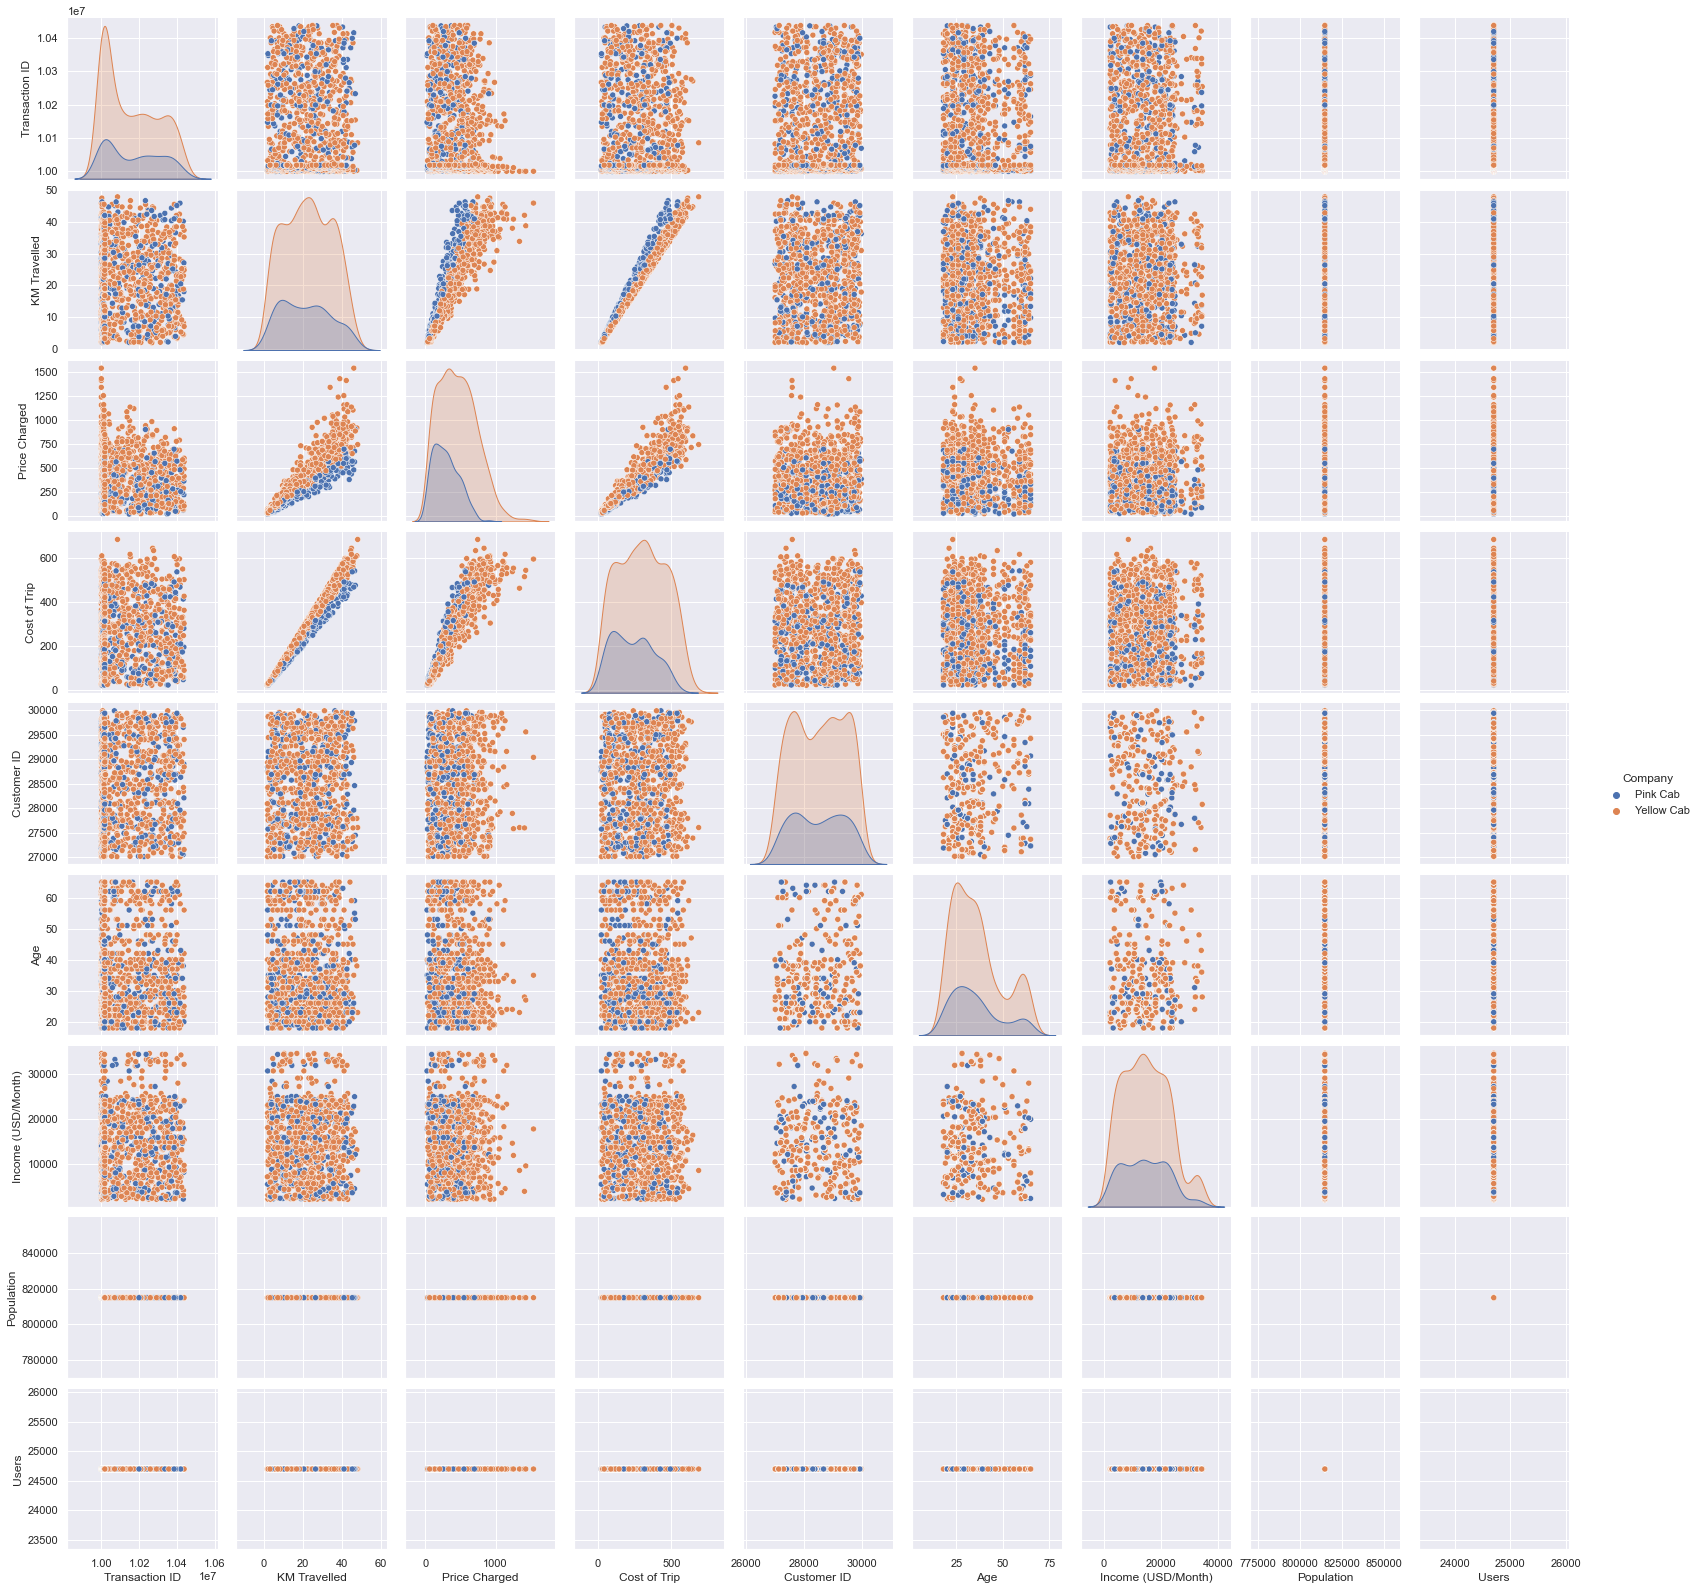

In [75]:
sns.pairplot(df.head(1000), hue = 'Company')

In [76]:
data_corr = df.corr()
data_corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


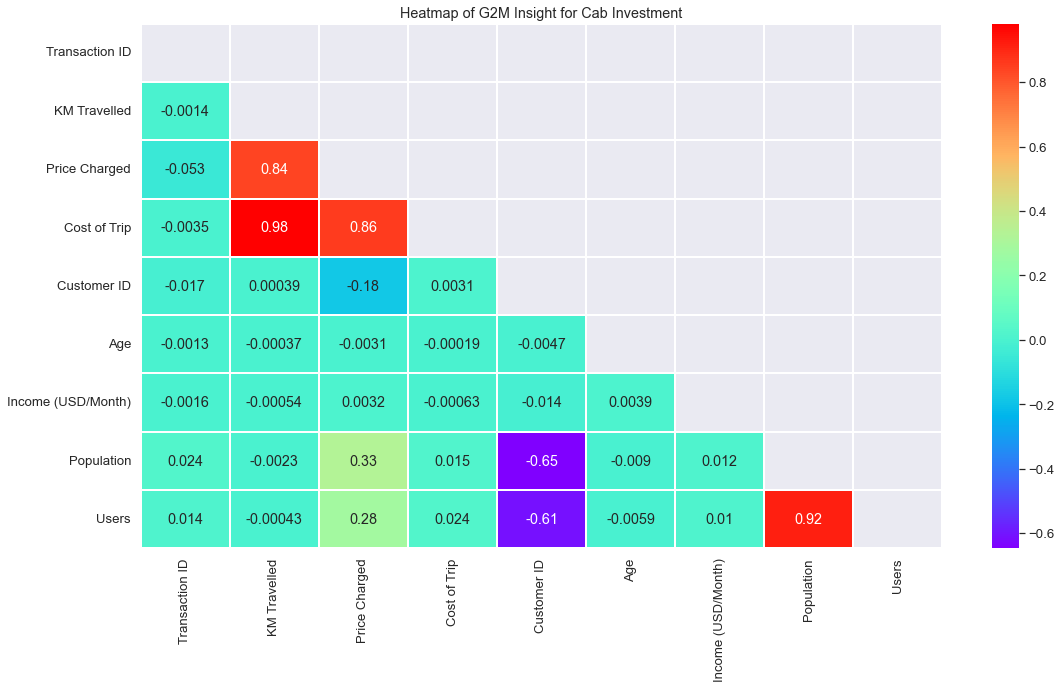

In [79]:
# Define the figure size
plt.figure(figsize = (16, 9))
matrix = np.triu(data_corr)
ax = sns.heatmap(data_corr, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5)
plt.title('Heatmap of G2M Insight for Cab Investment')
sns.set(font_scale = 1.2)

In [30]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 

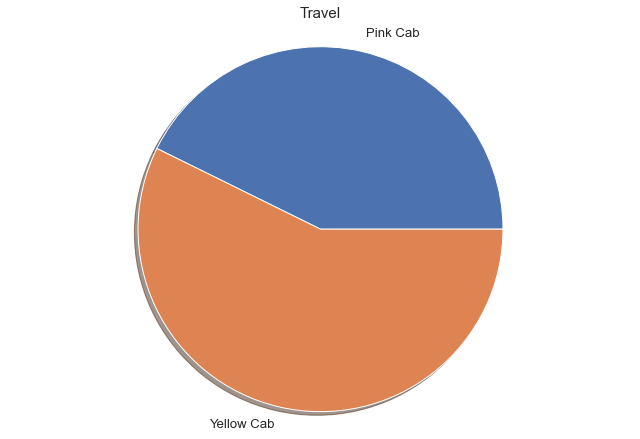

In [83]:
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, shadow=True)
axp.axis('equal')
plt.title('Travel', fontsize = 15)
plt.show()

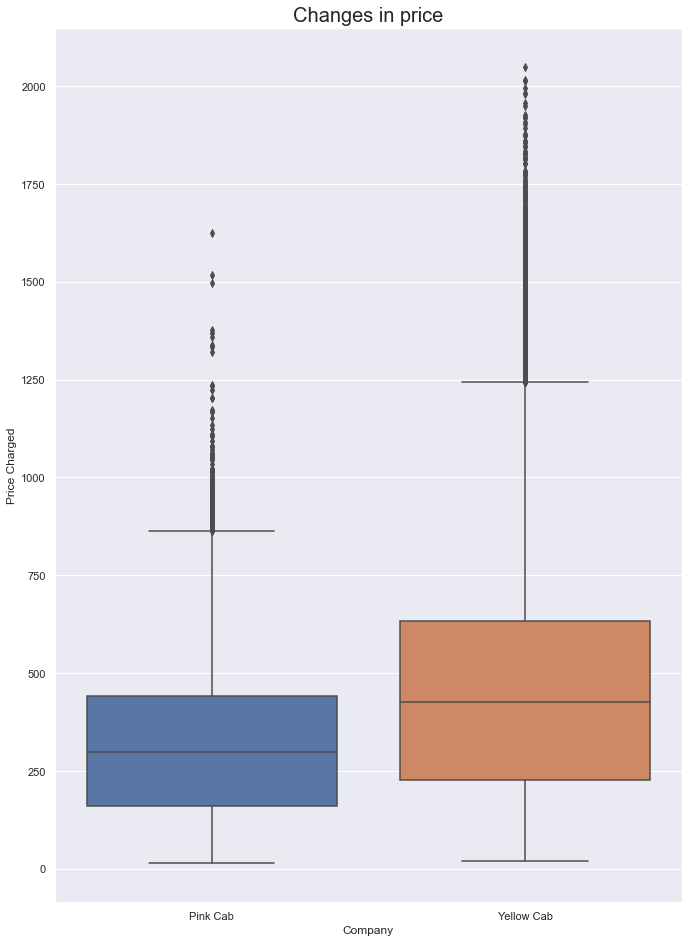

In [84]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (10, 15))
sns.boxplot(df['Company'], df['Price Charged'])
plt.title('Changes in price', fontsize=20)
plt.show()

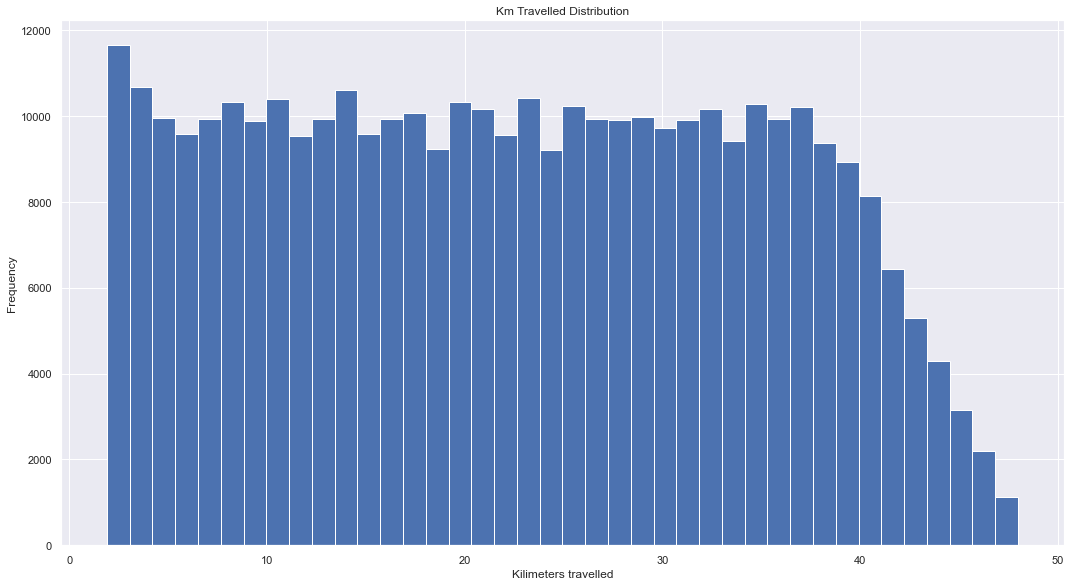

In [86]:
plt.figure(figsize = (16, 9))
plt.hist(df['KM Travelled'], bins = 40)
plt.title('Km Travelled Distribution')
plt.ylabel('Frequency')
plt.xlabel('Kilimeters travelled')
plt.show()

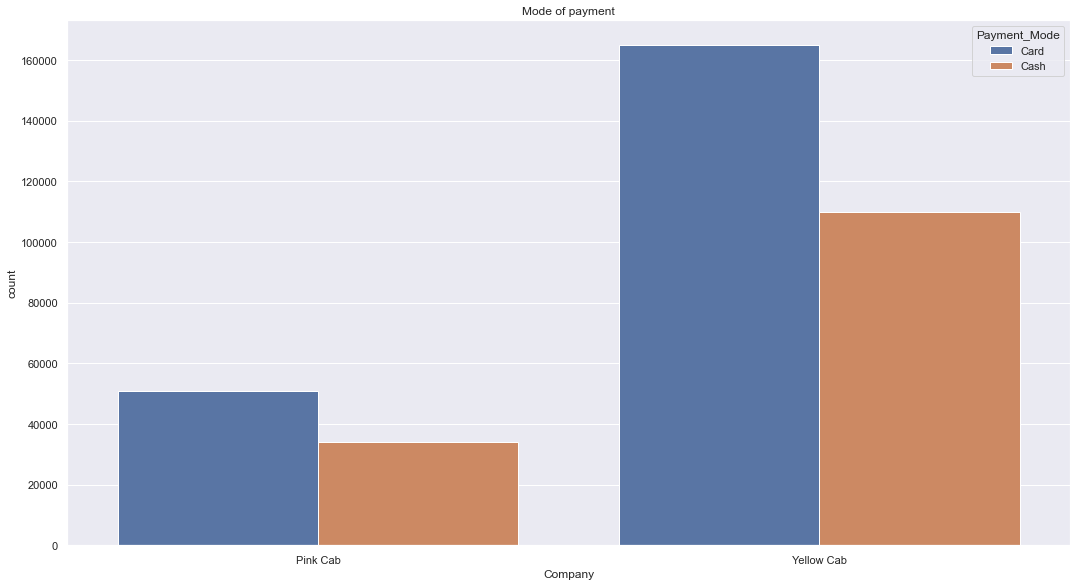

In [87]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Mode of payment')
plt.show()

In [90]:
g=df.groupby(['Company','Gender'])
g = g['Customer ID'].nunique()
print(g)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


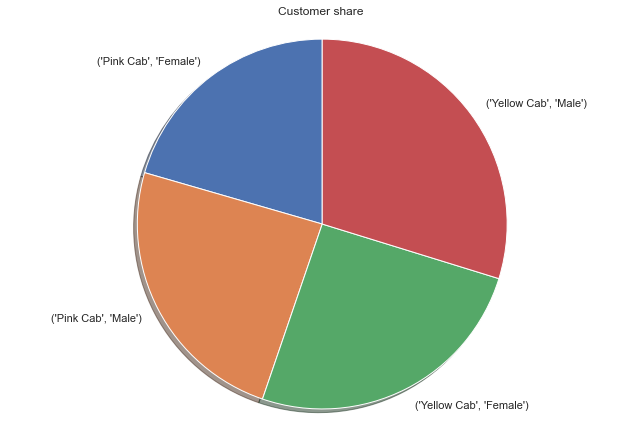

In [92]:
l = g.index
v = g.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(v , labels=l, shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Customer share')
plt.show()

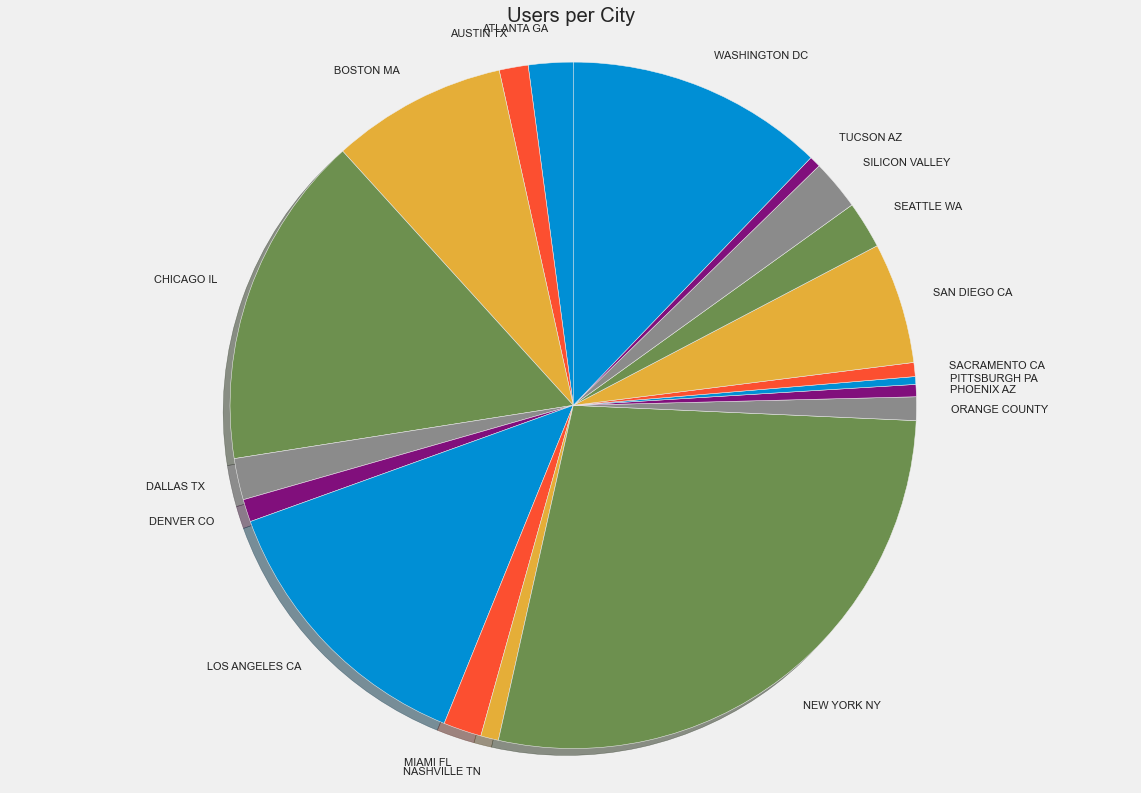

In [93]:
c_users = df.groupby('City')
c_users = c_users.Users.count()
l = c_users.index
v = c_users.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(v, labels=l, shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

In [94]:
company = df.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

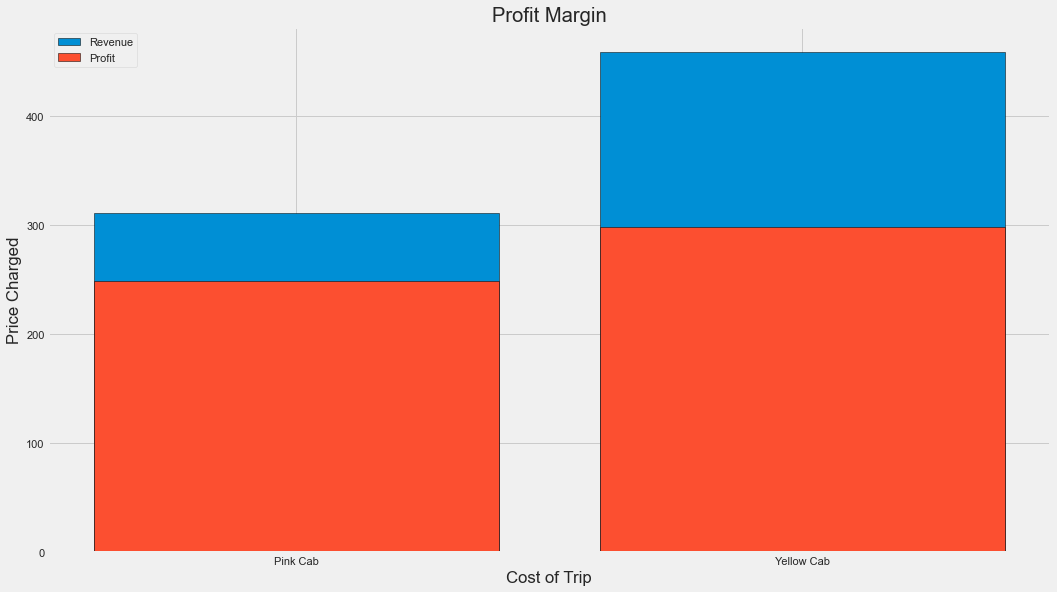

In [95]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16, 9))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

In [96]:
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

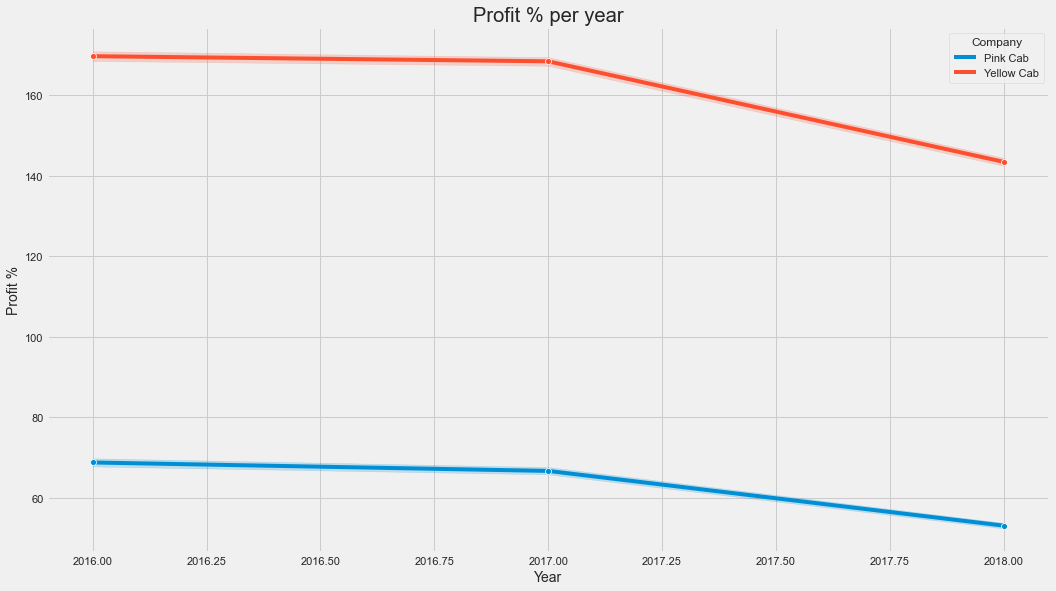

In [97]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

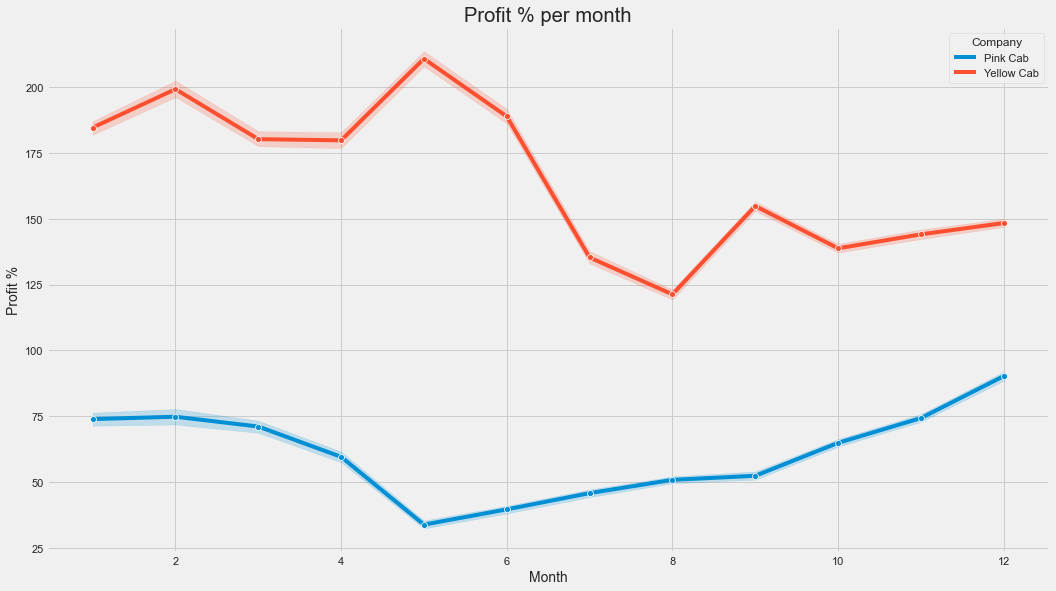

In [98]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

In [99]:
urp = (city_df['Users'] /city_df['Population']) * 100 
city = city_df['City']

In [100]:

from random import randint
colors = []
n = 16
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

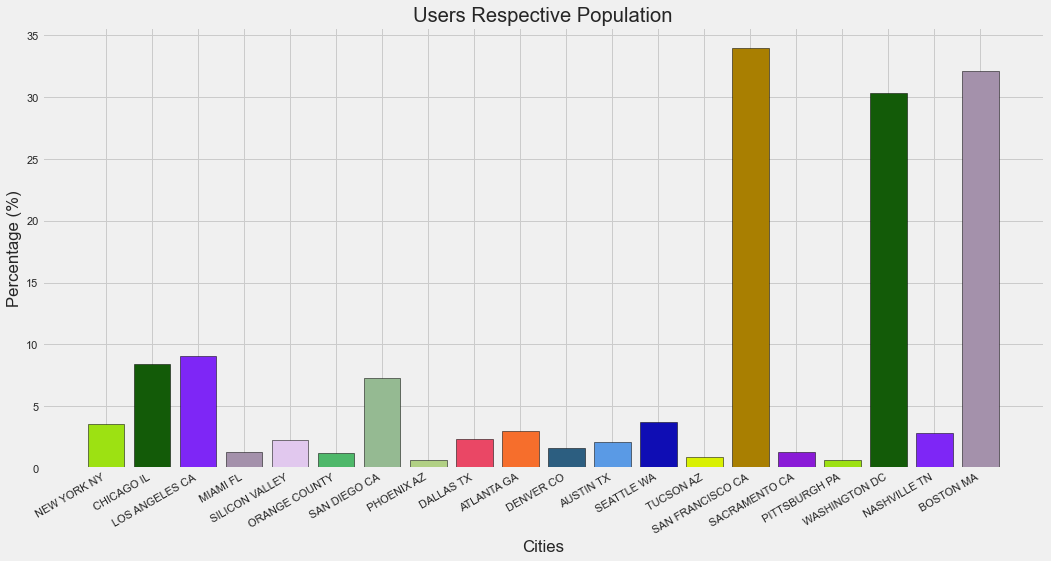

In [101]:
plt.figure(figsize = (16, 9))
plt.bar(city, urp, edgecolor='black', color = colors)
plt.gcf().autofmt_xdate()
plt.title('Users Respective Population')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()

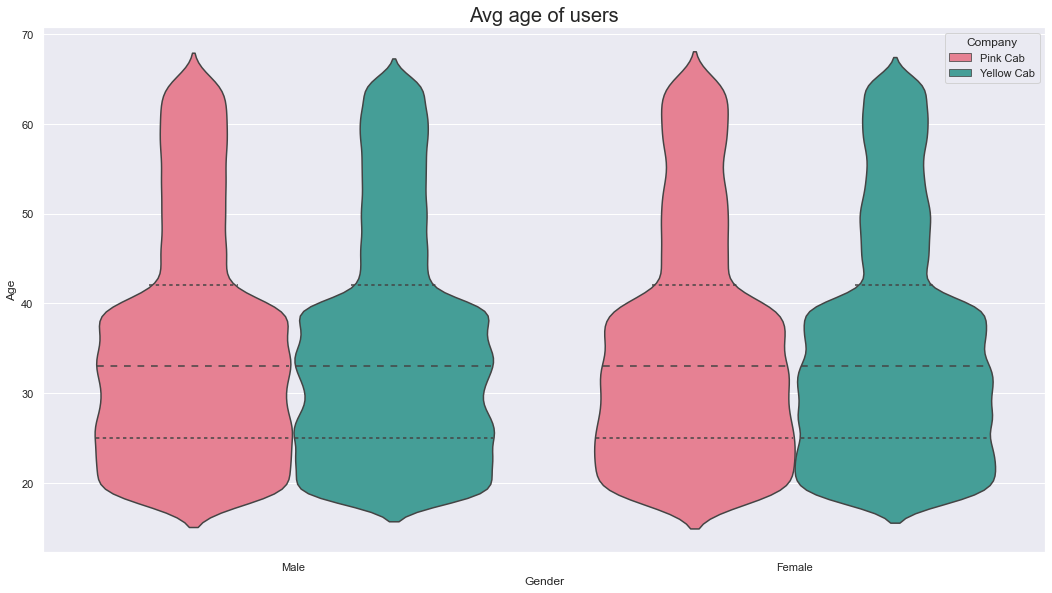

In [102]:
sns.set(style = 'darkgrid') 
plt.figure(figsize = (16, 9))
sns.violinplot(df['Gender'], df['Age'], hue = df['Company'], palette = 'husl', inner = 'quartiles')
plt.title('Avg age of users', fontsize=20)
plt.show()

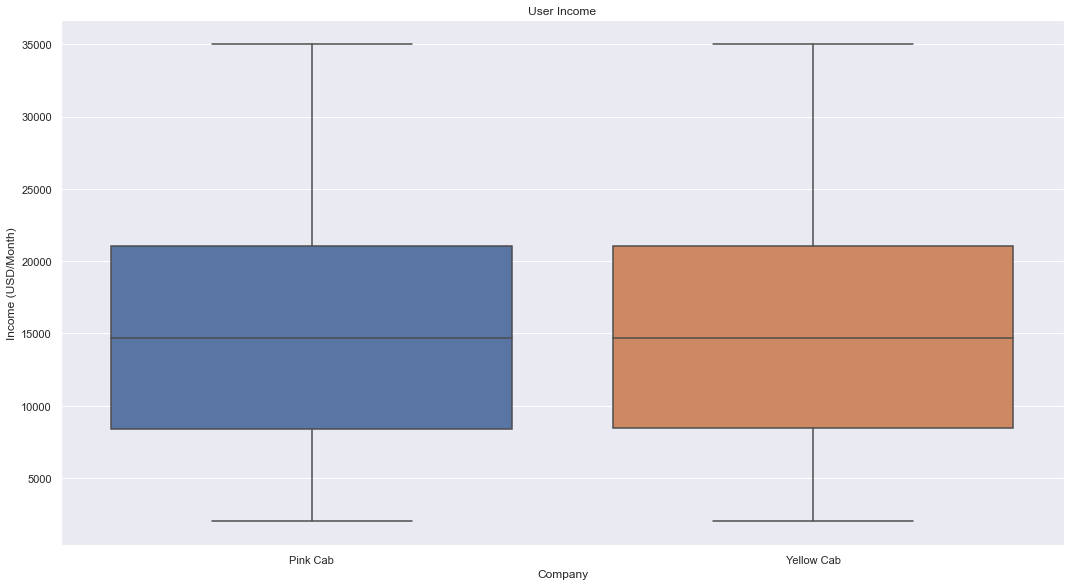

In [103]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (16, 9))
sns.boxplot(df['Company'], df['Income (USD/Month)'])
plt.title('User Income')
plt.show()

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

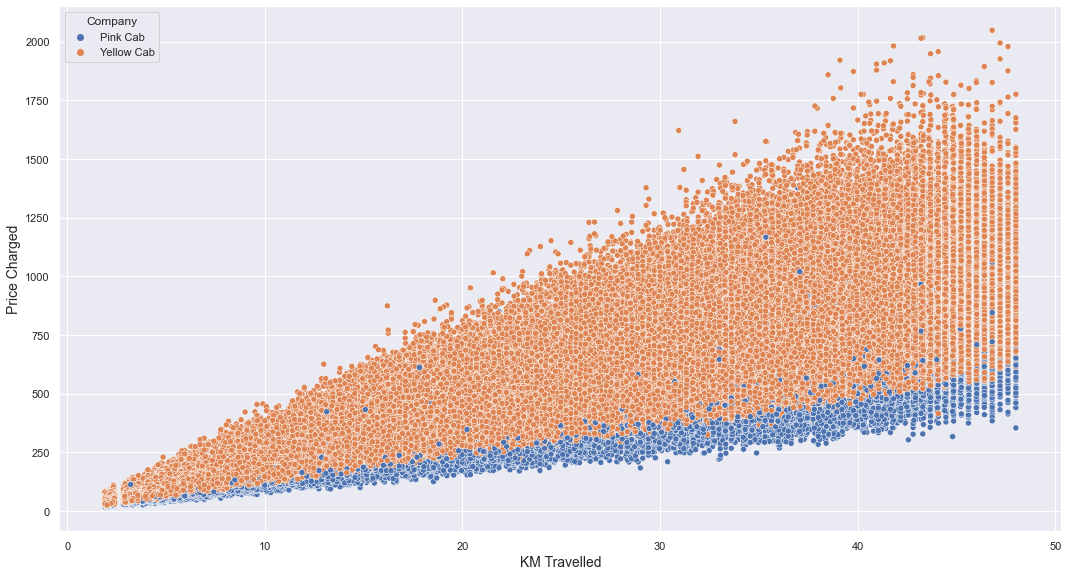

In [104]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company')

plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

In [111]:
a = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Alternative hypothesis (H1) is accepted that there is a difference regarding gender for Pink Cab')
else:
    print('Null hypothesis (H0) accepted that there is no difference regarding gender for Pink Cab')

47231 37480
P value is  0.11515305900425798
Null hypothesis (H0) accepted that there is no difference regarding gender for Pink Cab


In [112]:
a = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Alternative hypothesis (H1) is accepted that there is a difference regarding gender for Yellow Cab')
else:
    print('Null hypothesis (H0) accepted that there is no difference regarding gender for Yellow Cab')

158681 116000
P value is  6.060473042494144e-25
Alternative hypothesis (H1) is accepted that there is a difference regarding gender for Yellow Cab


In [113]:
a = df[(df.Age <= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Alternative hypothesis (H1) is accepted that there is a difference regarding age for Pink Cab')
else:
    print('Null hypothesis (H0) accepted that there is no difference regarding age for Pink Cab')

80125 5429
P value is  0.4816748536155635
Null hypothesis (H0) accepted that there is no difference regarding age for Pink Cab


In [114]:
a = df[(df.Age <= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Alternative hypothesis (H1) is accepted that there is a difference regarding age for Yellow Cab')
else:
    print('Null hypothesis (H0) accepted that there is no difference regarding age for Yellow Cab')

260356 17257
P value is  6.328485471267631e-05
Alternative hypothesis (H1) is accepted that there is a difference regarding age for Yellow Cab


In [115]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Alternative hypothesis (H1) is accepted that there is a difference in payment mode for Pink Cab')
else:
    print('Null hypothesis (H0) accepted that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793288
Null hypothesis (H0) accepted that there is no difference in payment mode for Pink Cab


In [116]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('Alternative hypothesis (H1) is accepted that there is a difference in payment mode for Yellow Cab')
else:
    print('Null hypothesis (H0) accepted that there is no difference in payment mode for Yellow Cab')

P value is  0.2933060638298729
Null hypothesis (H0) accepted that there is no difference in payment mode for Yellow Cab
